In [1]:
import fenics as fn
import numpy as np
#
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator

PDE problem:
$$
\left\{
\begin{array}{rlc}
\varepsilon u_x(x) + u(x) &= f(x) & \text{ in }(0,1) \\
u(0) &= 0 & 
\end{array}
\right.
$$

**Mesh**

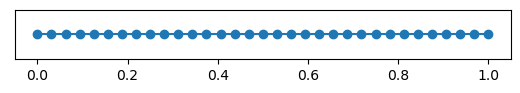

In [2]:
N = 32
mesh = fn.UnitIntervalMesh(N)
fn.plot(mesh)
plt.show()

**FE space**

In [3]:
Uh = fn.FunctionSpace(mesh,'CG',1)

**Trial and test functions**

In [4]:
uh = fn.TrialFunction(Uh)
vh = fn.TestFunction(Uh)

Variational formulation:
$$\int_{\Omega} (\varepsilon u_x + u)(\varepsilon v_x + v) = \int_{\Omega} f(\varepsilon v_x + v), \quad\forall v \in H^{1}$$

In [5]:
#
def biliniear_form_func(u,v,eps=0.001):
    aux = (eps*u.dx(0) + u)*(eps*v.dx(0) + v)*(fn.dx)
    return aux
# 
def rhs_func(f,v,eps=0.001):
    aux = f*(eps*v.dx(0) + v)*(fn.dx)
    return aux

**Rhs function**

In [6]:
f = fn.Expression('x[0]< 0.5 ? 0.: 1.',degree=0)

**Boundary Condition**

In [7]:
# Boundary condition
g = fn.Constant(0.)
bc_gamma = fn.DirichletBC(Uh,g,'x[0]<DOLFIN_EPS')

**Assembling**

In [8]:
eps = 0.001
b = biliniear_form_func(uh,vh,eps)
l = rhs_func(f,vh,eps)
# Linear system
B, L = fn.assemble_system(b,l,bc_gamma)

**Linear system as numpy array**

In [9]:
B_np = B.array()
L_np = L[:]

**Solving the linear system**

In [10]:
vec = np.linalg.solve(B_np,L_np)
uh_sol = fn.Function(Uh)
uh_sol.vector()[:] = vec

**Results**

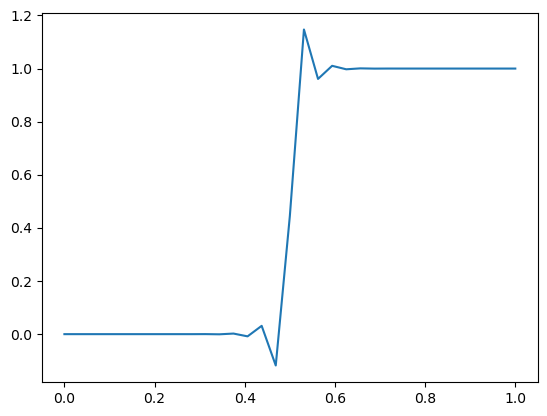

In [11]:
fn.plot(uh_sol)
#fn.plot(mesh)
plt.show()

##  $L_1$ regularization term

In [12]:
Dh = fn.FunctionSpace(mesh,'DG',0)
dh = fn.TestFunction(Dh)

**D matrix**

In [13]:
D = fn.assemble(uh.dx(0)*dh*(fn.dx))

In [14]:
print(D.array())

[[ 0.  0.  0. ...  0.  1. -1.]
 [ 0.  0.  0. ...  1. -1.  0.]
 [ 0.  0.  0. ... -1.  0.  0.]
 ...
 [ 0.  0.  1. ...  0.  0.  0.]
 [ 0.  1. -1. ...  0.  0.  0.]
 [ 1. -1.  0. ...  0.  0.  0.]]


**Exporting matrices**

In [15]:
np.savez('1D_LSQ_matrices',B=B_np,L=L_np,D=D.array())